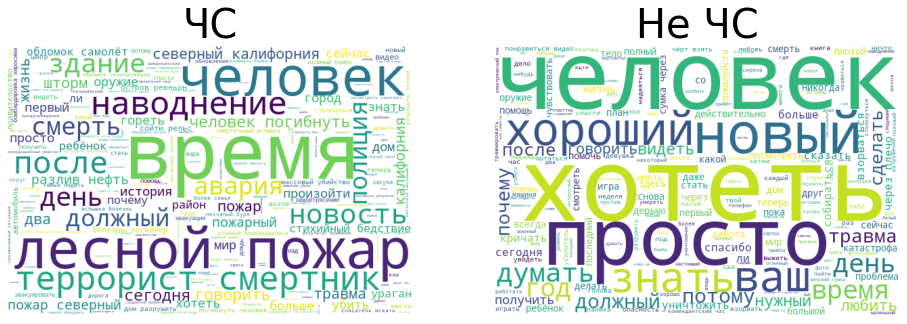

In [10]:
import spacy
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
i = 0
nlp = spacy.load('ru_core_news_sm')
STOP_WORDS = nlp.Defaults.stop_words
STOP_WORDS.add('через')


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>+')
    return html.sub(r'', text)


def remove_appeal(text):
    appeal = re.compile(r'@\w+')
    return appeal.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def only_russian_words(text):
    r = re.compile("[A-Za-z]+")
    return r.sub(r'', text)


def tokenize_text(text):
    global i
    i += 1
    print(i)
    doc = nlp(text)
    return [lemmatization(token).lower() for token in doc if not token.is_punct and ' ' not in token.text
            and 'Û' not in token.text and not is_stop_word(token.text.lower())]


def lemmatization(token):
    return token.lemma_


def is_stop_word(token):
    return token in STOP_WORDS


def clear_data(train, test):

    train.rename(columns={'russian_text': 'text'}, inplace=True)
    train['text'] = train['text'].apply(lambda text: remove_URL(text)).apply(lambda text: remove_appeal(text))
    train['text'] = train['text'].apply(lambda text: remove_html(text)).apply(lambda text: only_russian_words(text))
    train['text'] = train['text'].apply(lambda text: remove_emoji(text)).apply(lambda x: re.sub('\[.*?\]', '', x))
    train['text'] = train['text'].apply(lambda x: re.sub('\w*\d\w*', '', x))
    train['cleared_text'] = [' '.join(tokenize_text(text)) if tokenize_text(text) else np.nan for text in train['text']]
    train = train.dropna(how='any', axis=0)
    train = train[['text', 'cleared_text', 'target']]

    test.rename(columns={'russian_text': 'text'}, inplace=True)
    test['text'] = test['text'].apply(lambda text: remove_URL(text)).apply(lambda text: remove_appeal(text))
    test['text'] = test['text'].apply(lambda text: remove_html(text)).apply(lambda text: only_russian_words(text))
    test['text'] = test['text'].apply(lambda text: remove_emoji(text)).apply(lambda x: re.sub('\[.*?\]', '', x))
    test['text'] = test['text'].apply(lambda x: re.sub('\w*\d\w*', '', x))
    test['cleared_text'] = [' '.join(tokenize_text(text)) if tokenize_text(text) else np.nan for text in test['text']]
    return train, test


def cloud_words(disaster_tweets, non_disaster_tweets):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])
    wordcloud1 = WordCloud(background_color='white',
                           width=600,
                           height=400).generate(" ".join(disaster_tweets))
    ax1.imshow(wordcloud1)
    ax1.axis('off')
    ax1.set_title('ЧС', fontsize=40)

    wordcloud2 = WordCloud(background_color='white',
                           width=600,
                           height=400).generate(" ".join(non_disaster_tweets))
    ax2.imshow(wordcloud2)
    ax2.axis('off')
    ax2.set_title('Не ЧС', fontsize=40)


def main():
    train = pd.read_csv('clear_train.csv.', index_col=[0])
    test = pd.read_csv('clear_test.csv', index_col=[0])
    # train, test = clear_data(train, test)
    # train.to_csv('clear_train.csv')
    # test.to_csv('clear_test.csv')
    disaster_tweets = train[train['target'] == 1]['cleared_text']
    non_disaster_tweets = train[train['target'] == 0]['cleared_text']
    disaster_tweets = [' '.join([word for word in tweet.split() if word != 'через' and word != 'год' and word != 'сша']) for tweet in disaster_tweets]
    cloud_words(disaster_tweets, non_disaster_tweets)


if __name__ == '__main__':
    main()

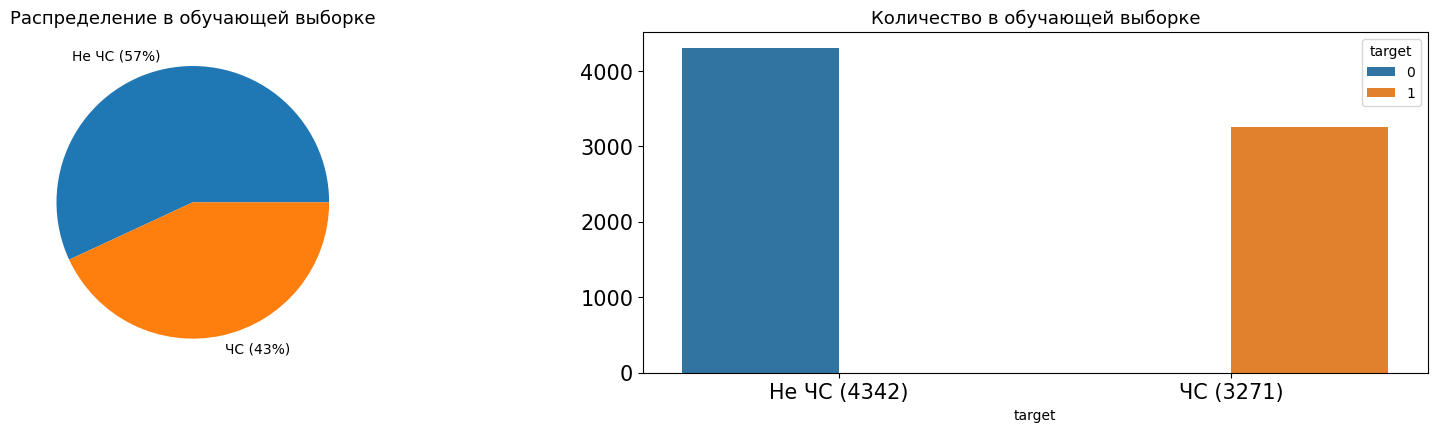

In [2]:
train = pd.read_csv('clear_train.csv.', index_col=[0])
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

train.groupby('target').count()['cleared_text'].plot(kind='pie', ax=axes[0], labels=['Не ЧС (57%)', 'ЧС (43%)'])
sns.countplot(x=train['target'], hue=train['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Не ЧС (4342)', 'ЧС (3271)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Распределение в обучающей выборке', fontsize=13)
axes[1].set_title('Количество в обучающей выборке', fontsize=13)

plt.show()

In [7]:
    import pandas as pd
    pd.set_option('display.max_columns', 10)
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_colwidth', 1000)
    train = pd.read_csv('clear_train.csv.', index_col=[0])
    test = pd.read_csv('clear_test.csv', index_col=[0])

In [9]:
train.iloc[[160, 570, 611, 615, 703], [1, 2]]

,cleared_text,target
164,эксперт франция приступить изучение обломок самолёт обнаружить остров реюньон среда французский эксперт авиационный происшествие приступить изучение обломок самолёт,1
577,прекращать поставка потенциальный патоген биотеррора,1
618,создание ии изменение климат биотерроризм массовый автоматизация персонал контакт другой жизнь неравенство богатство лёгкий,0
622,доброволец должный принять участие учение обеспечение готовность чрезвычайный ситуациям имитировать биотеррористическую катастрофа,1
710,подпишитесь посмотреть хит сингл,0


In [74]:
train[30:40]

,text,cleared_text,target
33,Последние новости В Абе подожжен флаг Нигерии,последний новость аба поджечь флаг нигерия,1
34,"Взывая о большем, подожги меня",взывая больший подожги,0
35,С положительной стороны ПОСМОТРЕТЬ НЕБО В ПРОШЛЮ НОЧЬЮ ЭТО БЫЛО ГОРЕЛА,положительный сторона посмотреть небо прошлю ночью горела,0
36,"они создали столько ажиотажа вокруг новых приобретений, но я сомневаюсь, что они зажгут в этом сезоне",создать столько ажиотаж вокруг новый приобретение сомневаться зажечь сезон,0
37,Подожгли офис в Абии,поджечь офис абии,1
38,Барбадос Бриджтаун ЯМАЙКА ‰ ÛÒ Подожжены две машины САНТА-КРУС ‰ ÛÓ Начальник полиции Сент-Элизабет,барбадос бриджтаун ямайка поджечь два машина санта крус начальник полиция сент элизабет,1
39,Пылает для тебя Господь:,пылать господь,0
40,Посмотрите их,посмотреть,0
41,снаружи ты пылаешь и жив\n но ты мертв внутри,снаружи пылать живой мёртвый внутри,0
42,"Отлично провели время, посетив головной офис , сайт и загорелся. Спасибо Тите Вида за заботу о нас.",отлично провести время посетить головной офис сайт загореться спасибо тите вида забота,0
